# Shurima Surveys
**Shurima Surveys is a non-government organization with the mission to empower people and communities in state of poverty, illiteracy, disease and social injustice. But the organization specializes in suicide preventions and mental healthcare. Surveys were conducted on people living in different rural zones. They record on the basis of there lifetyle, assets, income and so on.**

### Problem Statement:

The aim is to classify either the individual is depressed or not based on the data recorded.

**Attributes:**

* Survey_id: ID of the survey conducted

* Ville_id: Village ID where the survey was conducted(1-292)

* sex: Male or Female

* Age: Age of the individual(17-91)

* Married: Either the individual is married or not

* Number children: Number of children the individual has(0-11)

* education level: Education level(1-19)

* total_members: Total number of members in the family(1-12)

* gained asset: Total assets gained(325K-99.1M)

* durable_asset Total durable assets gained(163K-99.6M)

* save_asset Assets saved (173K-99.9M)

* living_expenses: Expense of living (263K-99.3M)

* other expenses: Other expenses(173K-99.8M)

* incoming_salary: Salaried or not

* incoming_own_farm: Does individual have a farm or not

* incoming_business: Any Business

* incoming_no_business: yes or no

* incoming_agricultural: Agricultural income(325K-99.8M)

* farm_expenses: Farming expense (272K-99.7K)

* labor primary: Yes or no

* lasting_investment: Lasting investments(74.3K-99.4M)

* no_lasting investmen: Non-Lasting investments(126K-99.6M)

**Target Variable:**

* depressed: Either the individual is depressed or not

### Tasks to be Perfromed:

In order to attain the above goal below tasks must be performed:

* Read the data and remove all the missing values. - **Beginner**

* Pre-process the data using LabelEncoder and split into training and testing set - **Beginner**

* Apply GradientBoosting Classifier and evaluate the model. - Intermediate Apply AdaBoost Classifier and evaluate the model. - **Intermediate** 

* Find the ROC-AUC Score of the models and plot on ROC-AUC Curve. - **Advanced**

**Topics Covered:**

* ROC-AUC

* AdaBoost

* GradientBoost

# Question -1: Read the data and remove all the missing values.

In [1]:
url='https://www.kaggle.com/datasets/diegobabativa/depression?select=b_depressed.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
import opendatasets as od
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: priyanshukumar02
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 47.7k/47.7k [00:00<00:00, 9.21MB/s]

In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('depression/b_depressed.csv')

In [6]:
df

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


In [15]:
df.shape

(1429, 23)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [18]:
df.describe(include='all')

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,...,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1429.000000,1.429000e+03,1.409000e+03,1429.000000
mean,715.00000,76.286214,0.918125,34.777467,0.772568,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,...,0.179846,0.251924,0.107768,0.260322,3.451039e+07,3.549153e+07,0.213436,3.299222e+07,3.360385e+07,0.166550
std,412.66108,66.444012,0.274271,13.986219,0.419320,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,...,0.384194,0.434270,0.310195,0.438964,2.077846e+07,2.112372e+07,0.409876,2.121621e+07,2.160228e+07,0.372704
min,1.00000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,358.00000,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,...,0.000000,0.000000,0.000000,0.000000,2.322229e+07,2.279966e+07,0.000000,2.001911e+07,2.064203e+07,0.000000
50%,715.00000,57.000000,1.000000,30.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1072.00000,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.348584e+07,0.000000,3.982686e+07,4.151762e+07,0.000000
max,1429.00000,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


In [19]:
miss = pd.DataFrame({'Col_name':df.columns,
                     'Missing value?':[any(df[x].isnull()) for x in df.columns],
                     'Count':[sum(df[y].isnull()) for y in df.columns],
                     'percentage':[sum(df[y].isnull())/df.shape[0] for y in df.columns]
                    })
miss.sort_values(by='Count',ascending=False)

,Col_name,Missing value?,Count,percentage
21,no_lasting_investmen,True,20,0.013996
0,Survey_id,False,0,0.000000
12,other_expenses,False,0,0.000000
20,lasting_investment,False,0,0.000000
19,labor_primary,False,0,0.000000
18,farm_expenses,False,0,0.000000
17,incoming_agricultural,False,0,0.000000
16,incoming_no_business,False,0,0.000000
15,incoming_business,False,0,0.000000
14,incoming_own_farm,False,0,0.000000


In [20]:
df.no_lasting_investmen.fillna(df.no_lasting_investmen.mean(),inplace=True)

In [21]:
miss = pd.DataFrame({'Col_name':df.columns,
                     'Missing value?':[any(df[x].isnull()) for x in df.columns],
                     'Count':[sum(df[y].isnull()) for y in df.columns],
                     'percentage':[sum(df[y].isnull())/df.shape[0] for y in df.columns]
                    })
miss.sort_values(by='Count',ascending=False)

,Col_name,Missing value?,Count,percentage
0,Survey_id,False,0,0.0
12,other_expenses,False,0,0.0
21,no_lasting_investmen,False,0,0.0
20,lasting_investment,False,0,0.0
19,labor_primary,False,0,0.0
18,farm_expenses,False,0,0.0
17,incoming_agricultural,False,0,0.0
16,incoming_no_business,False,0,0.0
15,incoming_business,False,0,0.0
14,incoming_own_farm,False,0,0.0


In [23]:
# Checking distribution of Target variable.
target_ratio=pd.DataFrame({'Counts':df.depressed.value_counts(),
                          'Percentage':df.depressed.value_counts()/len(df)})
target_ratio

,Counts,Percentage
0,1191,0.83345
1,238,0.16655


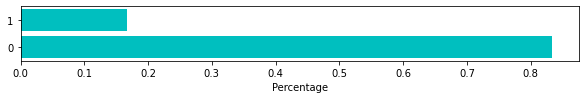

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
plt.barh(target_ratio.index,target_ratio.Percentage,color='c')
plt.xlabel('Percentage')
plt.show()

# Question-2: Pre-process the data using LabelEncoder and split into training and testing set.

In [25]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [26]:
lb=LabelEncoder()
df.depressed=lb.fit_transform(df.depressed)

In [27]:
lb.classes_

array([0, 1], dtype=int64)

In [28]:
df.columns

Index(['Survey_id', 'Ville_id', 'sex', 'Age', 'Married', 'Number_children',
       'education_level', 'total_members', 'gained_asset', 'durable_asset',
       'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

In [30]:
scale_cols=['Survey_id', 'Ville_id', 'sex', 'Age', 'Married', 'Number_children',
       'education_level', 'total_members', 'gained_asset', 'durable_asset',
       'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen']
df[scale_cols]=MinMaxScaler().fit_transform(df[scale_cols])

In [31]:
X=df.drop(['depressed','Survey_id', 'Ville_id'],axis=1)
y=df.depressed

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=2)

# Question-3: Apply GradientBoosting Classifier and evaluate the model.

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
gb_clf= GradientBoostingClassifier(learning_rate=0.5,n_estimators=1000)
gb_clf.fit(X_train,y_train)
gb_pred=gb_clf.predict(X_test)

In [36]:
print('The accuracy of the GradientBoostingClassifier model is:',round(accuracy_score(y_test,gb_pred)*100,2))

The accuracy of the GradientBoostingClassifier model is: 77.16


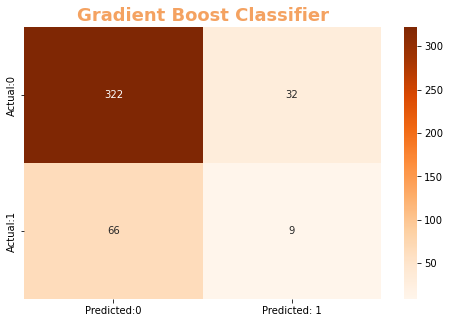

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,gb_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted: 1'], 
                          index=['Actual:0', 'Actual:1']) 
plt.figure(figsize=(8,5)) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges') 
fm={'size' :18, 'color': '#f4a261', 'weight':'bold'} 
plt.title('Gradient Boost Classifier', **fm) 
plt.show()

In [38]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print("True Negative", TN) 
print("True Positive", TP)
print("False Negative", FN)
print("False Positive", FP)
print("Sensitivity", sensitivity)
print("Specificity", specificity) 

True Negative 322
True Positive 9
False Negative 66
False Positive 32
Sensitivity 0.12
Specificity 0.9096045197740112


**Model is highly specific**

In [39]:
from sklearn.metrics import precision_score, classification_report,f1_score, recall_score

In [42]:
print("The precision of the GradientBoostingClassifier model is:",round(precision_score(y_test,gb_pred)*100,2))
print("The recall of the GradientBoostingClassifier model is:",round(recall_score(y_test,gb_pred)*100,2))
print("The F1_score of the GradientBoostingClassifier model is:",round(f1_score(y_test,gb_pred)*100,2))
print("\t\tClassification Report for Gradient Boost Classifier Model") 
print(classification_report(y_test,gb_pred))

The precision of the GradientBoostingClassifier model is: 21.95
The recall of the GradientBoostingClassifier model is: 12.0
The F1_score of the GradientBoostingClassifier model is: 15.52
		Classification Report for Gradient Boost Classifier Model
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       354
           1       0.22      0.12      0.16        75

    accuracy                           0.77       429
   macro avg       0.52      0.51      0.51       429
weighted avg       0.72      0.77      0.74       429



In [43]:
# Let's see precision and recall values
# Initialize the evaluation dictionary
def initialize_evaluator():
    return {'Model':[],'Accuracy':[],'Precision':[],'Recall':[],'F1_score':[]}

# Insert data in evaluation dictionary
def insert_data(test,pred,model):
    eval_data=initialize_evaluator()
    eval_data['Model'].append(model)
    eval_data['Accuracy'].append(accuracy_score(test,pred))
    eval_data['Precision'].append(precision_score(test,pred))
    eval_data['Recall'].append(recall_score(test,pred))
    eval_data['F1_score'].append(f1_score(test,pred))
    return eval_data

# Append data of one dictionary to another 
def append_data(data1,data2):
    for i in data1.keys():
        data2[i].extend(data1[i])
    return data2
    

In [45]:
eval_gb=insert_data(y_test,gb_pred, 'Gradient Boosting model')

In [46]:
eval_gb

{'Model': ['Gradient Boosting model'],
 'Accuracy': [0.7715617715617715],
 'Precision': [0.21951219512195122],
 'Recall': [0.12],
 'F1_score': [0.15517241379310345]}

# Question-4: Apply AdaBoost Classifier and evaluate the Model.

In [48]:
from sklearn.ensemble import AdaBoostClassifier

In [49]:
ada= AdaBoostClassifier(learning_rate=0.6,n_estimators=100)
ada.fit(X_train,y_train)
ada_pred=ada.predict(X_test)

In [50]:
print('The accuracy of the AdaBoost model is:',round(accuracy_score(y_test,ada_pred)*100,2))

The accuracy of the AdaBoost model is: 82.05


In [51]:
print("The precision of the AdaBoostClassifier model is:",round(precision_score(y_test,ada_pred)*100,2))
print("The recall of the AdaBoostClassifier model is:",round(recall_score(y_test,ada_pred)*100,2))
print("The F1_score of the AdaBoostClassifier model is:",round(f1_score(y_test,ada_pred)*100,2))
print("\t\tClassification Report for Gradient Boost Classifier Model") 
print(classification_report(y_test,ada_pred))

The precision of the AdaBoostClassifier model is: 37.5
The recall of the AdaBoostClassifier model is: 4.0
The F1_score of the AdaBoostClassifier model is: 7.23
		Classification Report for Gradient Boost Classifier Model
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       354
           1       0.38      0.04      0.07        75

    accuracy                           0.82       429
   macro avg       0.60      0.51      0.49       429
weighted avg       0.75      0.82      0.76       429



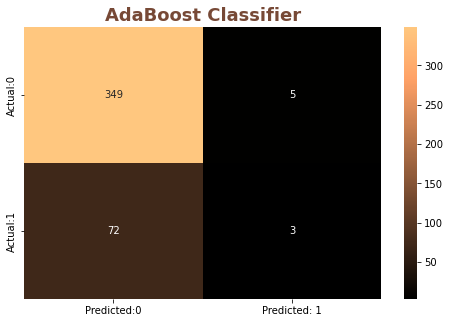

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ada_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted: 1'], 
                          index=['Actual:0', 'Actual:1']) 
plt.figure(figsize=(8,5)) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='copper') 
fm={'size' :18, 'color': '#774936', 'weight':'bold'} 
plt.title('AdaBoost Classifier', **fm) 
plt.show()

In [53]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print("True Negative", TN) 
print("True Positive", TP)
print("False Negative", FN)
print("False Positive", FP)
print("Sensitivity", sensitivity)
print("Specificity", specificity) 

True Negative 349
True Positive 3
False Negative 72
False Positive 5
Sensitivity 0.04
Specificity 0.9858757062146892


Both the models are highly specific.This is due to the number of positive observations are very less.

In [54]:
eval_ada=insert_data(y_test,ada_pred, 'AdaBoost model')

In [56]:
from xgboost import XGBClassifier
xb= XGBClassifier()
xb.fit(X_train,y_train)
xb_pred=xb.predict(X_test)
evl=append_data(eval_gb,eval_ada)
evl=append_data(insert_data(y_test,xb_pred,'XGBoost Model'),evl)

In [58]:
# Let's Plot the model
from matplotlib.gridspec import GridSpec
def plot_models(data):
    sns.set_palette(sns.color_palette("rocket"))
    super_title={'size':18, 'color':'#c5283d', 'weight':'bold'} 
    sub_title={'size':12, 'color':'#e06777', 'weight':'bold'}
    colors=np.array([[156, 137, 184], [239, 195, 230], [184, 190, 221], [231, 115, 171]])
    colors=colors/255 #Matplotlib RGB color range is from: 0-1
    data=pd.DataFrame(data) 
    fig = plt.figure(figsize=(10,7), constrained_layout=True) 
    gs= GridSpec(2, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.barh(data.Model, data.Accuracy, color=colors)
    ax1.tick_params(labelbottom=False, labelleft=True)
    ax1.set_xlim(0,1)
    ax1.set_title('Accuracy', **sub_title)
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.barh(data.Model, data.Precision, color=colors)
    ax2.tick_params(labelbottom=False, labelleft=False)
    ax2.set_xlim(0,1)
    ax2.set_title('Precision', **sub_title)
    ax3 =fig.add_subplot(gs[1, 0]) 
    ax3.barh(data.Model, data.Recall, color=colors)
    ax3.tick_params(labelbottom=True, labelleft=True)
    ax3.set_xlim(0,1)
    ax3.set_title('Recall', **sub_title)
    ax4=fig.add_subplot(gs[1, 1])
    ax4.barh(data.Model, data.F1_score, color=colors)
    ax4.tick_params(labelbottom=False, labelleft=False)
    ax4.set_xlim(0,1)
    ax4.set_title('F1 Score',**sub_title)
    fig.suptitle("Evaluation",**super_title)
    ax4.tick_params(labelbottom=True, labelleft=False) 
    plt.show()

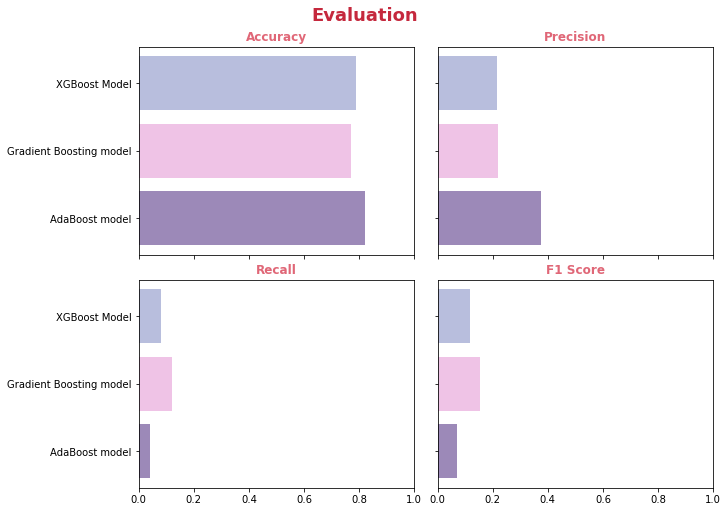

In [59]:
plot_models(evl)

Even though Gradient Boosting model has lowest accuracy it has good precision and f1 score to show that model is better than other two models. The reason for low precision and recall is due highly imbalanced target class.

# Question-5: Find the ROC-AUC Score of the models and plot on ROC-AUC Curve.

In [60]:
from sklearn.metrics import roc_auc_score, roc_curve

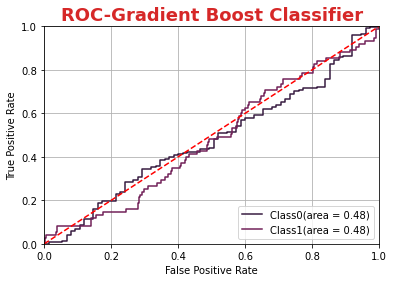

In [72]:
adamodel_prob=gb_clf.predict_proba(X_test).T

dummy_y_test=pd.get_dummies (y_test)

roc_auc=dict()
lfpr4=dict() 
ltpr6=dict()
lthresholds4=dict()
for i in dummy_y_test.columns:
    roc_auc[i]=roc_auc_score(dummy_y_test[i], adamodel_prob[i-1]) 
    lfpr4[i], ltpr6[i], lthresholds4[i]= roc_curve (dummy_y_test[i], adamodel_prob[i-1])

for i in dummy_y_test.columns:
    cls=lb.classes_
    plt.plot(lfpr4[i], ltpr6[i], label='Class' +str(cls[i])+ '(area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
fm={'size' :18, 'color': '#d62828', 'weight': 'bold'}
plt.title('ROC-Gradient Boost Classifier', **fm)
plt.legend(loc="lower right")
plt.grid()
plt.show()

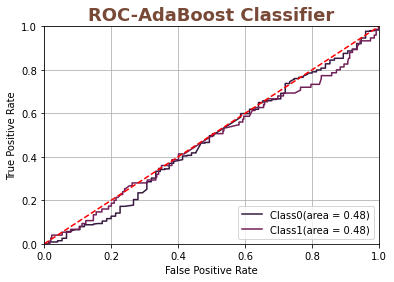

In [74]:
adamodel_prob=ada.predict_proba(X_test).T

dummy_y_test=pd.get_dummies (y_test)

roc_auc=dict()
lfpr4=dict() 
ltpr6=dict()
lthresholds4=dict()
for i in dummy_y_test.columns:
    roc_auc[i]=roc_auc_score(dummy_y_test[i], adamodel_prob[i-1]) 
    lfpr4[i], ltpr6[i], lthresholds4[i]= roc_curve (dummy_y_test[i], adamodel_prob[i-1])

for i in dummy_y_test.columns:
    cls=lb.classes_
    plt.plot(lfpr4[i], ltpr6[i], label='Class' +str(cls[i])+ '(area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
fm={'size' :18, 'color': '#774936', 'weight': 'bold'}
plt.title('ROC-AdaBoost Classifier', **fm)
plt.legend(loc="lower right")
plt.grid()
plt.show()